# Text analysis in finance

So far we mostly discussed different methods how text can be transformed into numerical representations. Starting from frequency based bag-of-word type representations to methods including semantic meaning like Word2Vec and Doc2Vec. Given we generate the numerical representation of text, we may use it for different applications which are specific for the domain, i.e., for us it is the domain of financial markets. So let us take a look at common goals for financial text analysis. 

A very popular one is the detection of sentiment of financial text, e.g., do earning calls of companies include negative, neutral or positive tone. Furthermore, besides sentiment analysis, the disclosure of topics in financial reports can be of high interest. For instance, how does a company reports about its risk management of its exposure to risk factors as the development of the economy or its exposure to non-financial risk factors including environmental, social or governance issues of the company.

Why would anyone care about these things? With a very general point of view, financial markets are about the distribution of money where, if everything behaves as desired, money is transferred to entities which seem to be best in creating values. Again, values is a very general description for things such as the development of products and services of high quality. Usually, the ones which succeed best in generating values are the ones which make large gains and grow in value. This means investors on financial markets want to transfer their funds to the most promising entities with this respect. To achieve this goal, investors make use of all information available. Starting from quantitative facts such as numbers from, e.g., balance sheet and financial statements, to the content of financial reports, news, earning calls, etc. Whenever information is published which impacts future earnings, investor's adjust their expectation of a company's value and by this means the price they are willing to pay for an asset. 

Bringing this narrative to financial texts, investor want to be informed about aspects which may be relevant for the company's future. Given the immense amount of textual information on financial markets, they are in need of tools supporting their information gathering process. This is why text models which are able to automatically generate information on the content of financial texts are relevant and needed.

## Non-noisy vs noise tasks

If we want to evaluate the performance of a financial text model, we need labels which relate to text information, e.g., is the sentence positive, neutral or negative. One way to create these labels is by manual labeling which means that we select a number of text examples and label them ourselves. The positive aspect of manual labeling is that a genuine and direct link exists between text information and its label. On the negative side, labeling is a time-consuming process which can adversely be impacted by subjection. An alternative to manual labeling in the financial domain is to treat market reactions as the label, i.e., if the price of an asset in- or decreases after the release of textual information, the reaction of the market is treated as a label of positive (price increase) or negative (price decrease). This liberates us from manual labeling, however, comes along with some drawbacks. For instance, the text may include information which is relevant for the assets future development, but, investors do not react towards the information, given they learned about it before from other sources. Or, the information in the text is irrelevant for the assets future, however the market reacts to other developments, e.g., future adverse conditions of the economy. Bottom line, the link between text and market reactions is rather blurry and noisy.

## Quantifying stock market reactions

Nevertheless, market reactions are more often used in research due to its easier access and broader availability. So let us take a look how we exactly quantify stock market reactions. As defined in a previous chapter, we define the discrete return of this asset as:

$$
r_t = \frac{s_{t} - s_{t-1}}{s_{t-1}} = \frac{s_{t}}{s_{t-1}} - 1
$$

given the price of an asset $s_t$ at time $t$. Sometimes, one may use the log-return instead which is defined by:

$$
z_t = \ln \left( \frac{s_{t}}{s_{t-1}} \right) = \ln \left(1 + r_t\right)
$$

The choice between discrete or log-returns depends on the assumption of discrete vs. continuous trading of assets and a few practical considerations such as discrete returns are additive in the cross-section (at a given point in time) and log-returns are additive over time. 

### Event returns

Given the return of an asset at $t$ at which textual information is published, one whishes to determine if or how the information is affecting the return and by these means, the market value of an asset. Financial markets are usually very efficient. In this context this means, information which is released by, e.g., an event such as a earning call, is immediately processed by investors. Investors adjust demand and offering prices according to their believes and the effect of the event is immediately reflected in the current price. Thus, to examine if an event affects an asset's value, it is reasonable to examine the value's change over the event time period. Let the event occur at time $t$, we include the return $r_t$ which reflects the value change from the last time step before the event $t-1$ until the event at $t$. Furthermore, one adds returns following $t$, if the event impacts the value after it occurred. It is common to include only a few more time steps such as one or two. If we include too many time steps afterwards, it gets more likely that the quantified reaction is related to other events following $t$.

For instance, if Apple is holding a earning call on Wednesday, we would use the return of its stock price from Tuesday until Thursday or Tuesday until Friday to quantify the stock market reaction towards this earning call. To isolate the impact of the event as good as possible, we try to determine the quantify only the unexpected change in the stock price value. 

### Excess returns

What we expect, needs to be defined. The literature either uses excess returns or abnormal returns with this respect. Even though the exact definitions sometimes differ, excess returns are differences of the company's minus a benchmark $b$:

$$\tilde{r}_{t} = r_{t} - r_{t, b}$$

The benchmark in this context can be a market return from a broad and well diversified market portfolio such as the S\&P 1500 or the Euro Stoxx 600. The idea of this excess return is related to the fact that the majority of asset returns are positively correlated, i.e., usually the direction of the stock price movement is similar among assets on the same day. Thus, a positive return may mostly be related to the overall market movement and not to a company specific event. However, if $\tilde{r}_{t}>0$ signals a positive development in relation to the systematic market movement which may be ascribed to company specific events. Obviously, the same can be said about $\tilde{r}_{t}<0$ signaling an adverse development in relation to the market movement. 

If you take a look in the plot below, you observe the relative stock price development for large US stocks and two major indices (Russell 3000 and S\&P 500). We can see that all assets massively loose value in March 2020. This development occurred in the beginning of the Covid crisis which had a systematic impact on all assets. Systematic market movements like these are not related to company specific events and thus, should be filtered first to isolate the relationship between company information and asset price development. 

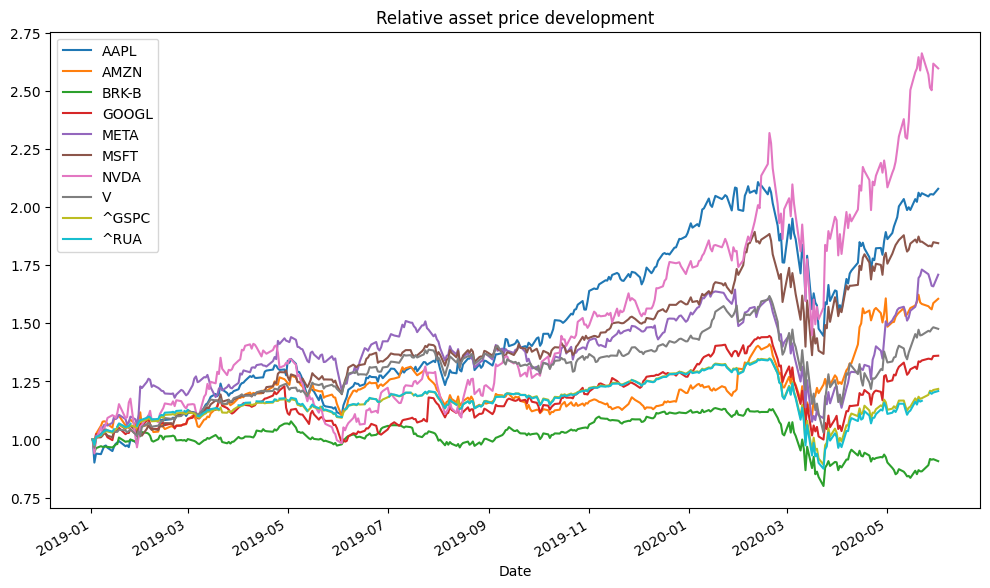

In [1]:
import pandas as pd

df_close = pd.read_csv("../data/stock_prices.csv", index_col="Date")
df_close.index = pd.to_datetime(df_close.index)

df_ttr = df_close.divide(df_close.iloc[0, :])
ttr_plot = df_ttr.loc[:pd.to_datetime("2020-06-01"), :].plot(figsize = (12, 7), title = "Relative asset price development").legend(loc = "upper left")
df_returns = df_close.divide(df_close.shift(1)).subtract(1).dropna()

### Abnormal returns

A even more sophisticated way is to estimate the expected return $\mu_t$ and subtract it from the realized return. This is called abnormal return $ar_t$

$$
ar_t = r_t - \mu_t
$$

Abnormal, because it quantifies the unexpected and by this means abnormal deviation from the expectation. To determine $\mu_t$, one can choose among different models. A popular choice is given by factor models. These models regress returns on systematic factors $\mathbf{f}_t$:

$$
r_t = \beta_0 + \boldsymbol{\beta}^T \boldsymbol{f}_t + \epsilon_t
$$

where $\boldsymbol{f}_t^T = \begin{pmatrix} f_{t, 1} & f_{t, 2} & f_{t, 3} & ...  \end{pmatrix} $ are the observations for a number of systematic factors at $t$. Once the model parameters $\beta_0, \beta_1, \beta_2, ...$ are estimated, the expected value at time $t$ is given by:

$$
\mu_t = \beta_0 + \boldsymbol{\beta}^T \boldsymbol{f}_t
$$

Thus, given this notation, $\epsilon_t = ar_t$ which is the part of $r_t$ that can not be explained by the factors at time $t$. 

For instance, let us assume to use one factor only for stock market companies, we may regress each stock's return $r_{t, i}$ on a stock market portfolio return $r_{t, m}$. To keep this simple at this stage, let us use a broad market index like the Russell 3000 to approximate the market portfolio. Common approaches in the financial area to capture these systematic effects more appropriately are factor models like the capital asset pricing model, the Fama-French three factor or the Carhardt four factor model. 

The output in the cell below is based on a model which regresses the Apple return upon the return of the Russell 3000 index:

$$
r_{t, AAPL} = \beta_0 + \beta_1 r_{t, R3000} + \epsilon_t
$$

From this regression model, we know that the expected value for Apple, given the realization of the Russell 3000 return is equal to: $\mu_{t, AAPL | r_{t, R3000}} = \beta_0 + \beta_1 r_{t, R3000}$; the filtered abnormal return is given by:

$$
\epsilon_t = r_{t, AAPL} - \beta_0 - \beta_1 r_{t, R3000}
$$

The cell below illustrates Apple's filtered and unfiltered return in the first half of 2020. We observe, that especially in the financial downturn month of the Covid pandemic (March 2020), Apple's development has been not as worse as the overall market development. 

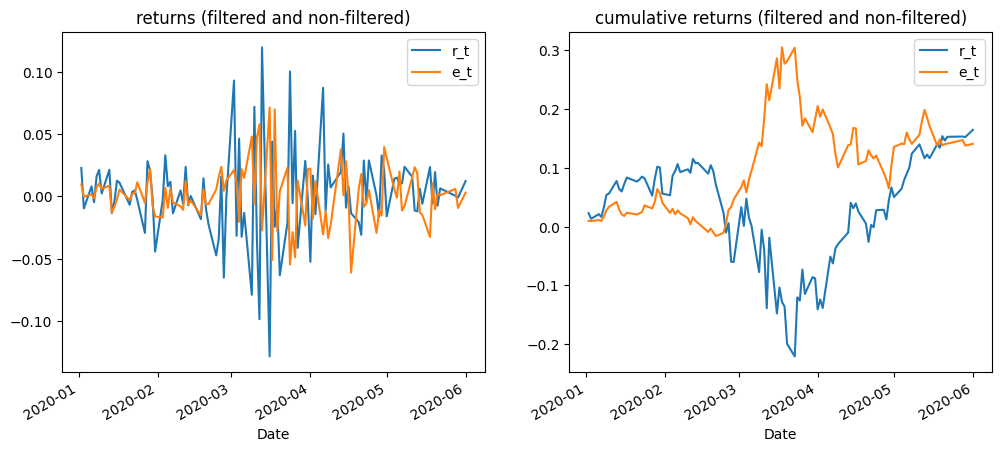

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt

start_regression = pd.to_datetime("2019-01-01")
end_regression = pd.to_datetime("2020-01-01")
end_out_of_time = pd.to_datetime("2020-06-01")

ticker = "AAPL"
portfolio = "^RUA"
X = df_returns.loc[start_regression:end_regression, portfolio].values.reshape(-1, 1)
y = df_returns.loc[start_regression:end_regression, ticker].values

lr = LinearRegression()
lr.fit(X, y)

#b0, b1 = lr.intercept_, lr.coef_

X_oot = df_returns.loc[end_regression:end_out_of_time, portfolio].values.reshape(-1, 1)
y_oot = df_returns.loc[end_regression:end_out_of_time, ticker].values

e_oot = y_oot - lr.predict(X_oot)
results = pd.DataFrame(data = dict(r_t = y_oot, e_t = e_oot), index = df_returns.loc[end_regression:end_out_of_time].index)

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
results.plot(title = "returns (filtered and non-filtered)", ax = axs[0])
results.cumsum().plot(title = "cumulative returns (filtered and non-filtered)", ax = axs[1])
plt.show()

### Stock market reaction

No matter if we use the excess or the abnormal return, to finally quantify the stock market reaction around a event time $t$, we define a window size $w$ and determine the cumulative return. Let $r_t^{*}$ either represent the excess or abnormal return at time $t$, stock market reaction is equal to the cumulative return

$$
cr_{t, w} = \sum_{t=1}^{w-1} r_t^{*}
$$

Note that a model which is able to predict $cr_{t, w}$ does not predict the future development after an event. Yet, $cr_{t, w}$ can be used to gain a deeper understanding how market participants process different types of information. Positive values are interpreted as positive reactions and vice versa. 

The cell below shows the filing dates of form 8-K, 10-Q and 10-K filings made by Apple in the first half of 2020. While form 10-Q and 10-K filings refer to regular quarter and annual reports, form 8-K filings are reports which must be filed when major events occur that shareholders should know about. 

In [3]:
apple_filings_all = pd.read_csv("../data/apple_filings_all.csv")
apple_filings_all.index = pd.to_datetime(apple_filings_all.filingDate)
apple_filings_all.sort_index(inplace = True)
apple_filings_all.loc[end_regression:end_out_of_time, ]

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription,ticker,cik
filingDate,,,,,,,,,,,,,,,,
2020-01-28,0000320193-20-000008,2020-01-28,2020-01-28,2020-01-28T16:30:40.000Z,34.0,8-K,001-36743,20554729,"2.02,9.01",531866,1,1,a8-kq1202012282019.htm,8-K,AAPL,320193
2020-01-29,0000320193-20-000010,2020-01-29,2019-12-28,2020-01-28T18:02:44.000Z,34.0,10-Q,001-36743,20555794,NaN,9292589,1,1,a10-qq1202012282019.htm,10-Q,AAPL,320193
2020-02-18,0001193125-20-039203,2020-02-18,2020-02-17,2020-02-18T06:24:57.000Z,34.0,8-K,001-36743,20623292,"7.01,9.01",310140,1,1,d845033d8k.htm,FORM 8-K,AAPL,320193
2020-02-27,0001193125-20-050884,2020-02-27,2020-02-26,2020-02-27T06:14:21.000Z,34.0,8-K,001-36743,20658351,5.07,329670,1,1,d865740d8k.htm,8-K,AAPL,320193
2020-04-30,0000320193-20-000050,2020-04-30,2020-04-30,2020-04-30T16:30:41.000Z,34.0,8-K,001-36743,20836131,"2.02,9.01",593101,1,1,a8-kq220203282020.htm,8-K,AAPL,320193
2020-05-01,0000320193-20-000052,2020-05-01,2020-03-28,2020-04-30T18:03:10.000Z,34.0,10-Q,001-36743,20837377,NaN,10648806,1,1,a10-qq220203282020.htm,10-Q,AAPL,320193
2020-05-11,0001193125-20-139112,2020-05-11,2020-05-04,2020-05-11T16:31:15.000Z,34.0,8-K,001-36743,20865313,"8.01,9.01",771520,1,1,d926511d8k.htm,8-K,AAPL,320193


In the next cell, we take a look at the three day window cumulative abnormal returns of Apple at filing dates. We compare them with the corresponding cumulative returns of Apple and the Russell 3000. We observe mostly positive $cr_{t,3}$ values at filing dates. The average value of these $cr_{t, 3}$ at filing dates equals $0.0287$, while notably, the average value at days without filings is considerably lower ($0.0007$). Furthermore, it is interesting if the filing content impacts $cr_{t, 3}$ values.

In [4]:
import numpy as np

russell_returns = df_returns.loc[end_regression:end_out_of_time, "^RUA"]
cumulative_values = []
for i in range(results.shape[0]-1):
    #cumulative_values.append(results.iloc[i:i+2, :].sum().values)
    cumulative_values.append(np.concatenate((results.iloc[i:i+2, :].sum().values , np.array([russell_returns.iloc[i:i+2].sum()]))))

cumulative_df = pd.DataFrame(cumulative_values, index = results.index[:-1], columns = ["cr_t", "car_t", "cr_t_russell"])
event_dates = apple_filings_all.loc[end_regression:end_out_of_time, ].index
events = cumulative_df.loc[event_dates].merge(apple_filings_all.loc[:, "form"], left_index = True, right_index = True)
urls = []
base_url = "https://www.sec.gov/ix?doc=/Archives/edgar/data/0000320193/"
for idx, row in apple_filings_all.loc[end_regression:end_out_of_time, ].iterrows():
    url = base_url + row["accessionNumber"].replace("-", "") + "/" + row["primaryDocument"]
    urls.append(url)

no_event_dates = [date for date in cumulative_df.index if not(date in event_dates)]

print(f"Average car_t values around filing days: {events.car_t.mean():.4f} \nAverage car_t values at other days: {cumulative_df.loc[no_event_dates].car_t.mean():.4f} \n{'-'*50}")
print(events)

Average car_t values around filing days: 0.0287 
Average car_t values at other days: 0.0007 
--------------------------------------------------
                cr_t     car_t  cr_t_russell  form
filingDate                                        
2020-01-28  0.049222  0.032935      0.008913   8-K
2020-01-29  0.019483  0.014677      0.001874  10-Q
2020-02-18 -0.003828 -0.009502      0.002406   8-K
2020-02-27 -0.065953  0.017331     -0.052132   8-K
2020-04-30  0.004997  0.070515     -0.041240   8-K
2020-05-01 -0.001950  0.036495     -0.024642  10-Q
2020-05-11  0.004307  0.038739     -0.022182   8-K


So, let us check this manually and read a little of the filings content which can be accessed by the links below.

| $cr_{t, 3}$ | url |
|--|--|
|$0.0329$|https://www.sec.gov/ix?doc=/Archives/edgar/data/0000320193/000032019320000008/a8-kq1202012282019.htm|
|$0.0147$|https://www.sec.gov/ix?doc=/Archives/edgar/data/0000320193/000032019320000010/a10-qq1202012282019.htm|
|$-0.0095$|https://www.sec.gov/ix?doc=/Archives/edgar/data/0000320193/000119312520039203/d845033d8k.htm|
|$0.0173$|https://www.sec.gov/ix?doc=/Archives/edgar/data/0000320193/000119312520050884/d865740d8k.htm|
|$0.0705$|https://www.sec.gov/ix?doc=/Archives/edgar/data/0000320193/000032019320000050/a8-kq220203282020.htm|
|$0.0365$|https://www.sec.gov/ix?doc=/Archives/edgar/data/0000320193/000032019320000052/a10-qq220203282020.htm|
|$0.0387$|https://www.sec.gov/ix?doc=/Archives/edgar/data/0000320193/000119312520139112/d926511d8k.htm|

The value for $cr_{t, 3}$ around each filing seems to be strongly related to the content of each filing. This is exactly where text analysis enters the stage. The more accurate the text model is in predicting the $cr_{t, w}$, the better it captures the reaction of market participants towards textual information. Once we estimate a model successfully which uses text as input and outputs predictions for the $cr_{t, w}$ we can use the prediction as an approximation for the financial tone, i.e., if market participants identify the information to have a positive or negative impact on the future market value of an asset. Different approaches for this purpose have been analyzed in the previous literature, so let us take a look at some examples. 

## Predicting stock market reactions

A text based measure for the stock market reaction is a prediction for $cr_{t, w}$, given text information for an event at time $t$. To build such a prediction model, we need:

* a numerical representation of text
* a trained model which predicts values for $cr_{t, w}$ as accurate as possible

With the approaches we learned so far in this book, we already have different options for the transformation of text into numbers:

* bag-of-words
* tfidf
* dictionary based frequencies
* document embeddings by aggregating Word2Vec vectors of words in a document
* document embeddings by Doc2Vec

With respect to the prediction model, we already can choose among all supervised learning model which are able to be trained for a regression task. A regression task is a prediction task which utilizes feature realizations $X$ to predict a real-valued target variable $\mathbf{y}$. As the scope of this course is about text modeling, we leave out detailed explanations of supervised learning algorithms, however, e.g., neural networks which have been discussed in a previous chapter would be a reasonable choice. 

Let us formalize the prediction model for the application of stock market reactions. Given a corpus of documents $\lbrace \text{doc}_1, \text{doc}_2, ..., \text{doc}_n \rbrace$, we use a text model to convert these document to the numerical representation:

$$
X = 
\begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{np} \\
\end{pmatrix}
$$

Hereby, each row corresponds to one document, thus $n$ is equal to the number of documents and $p$ is the dimension which we use to represent every document. For instance in case of a bag-of-word approach, $p$ is the number of terms in the dictionary or if we use a Doc2Vec model, $p$ is equal to the embedding dimension.

Given we are able to calculate cumulative (excess or abnormal) returns that correspond to each document, the target variable is:

$$
\mathbf{y} = 
\begin{pmatrix}
cr_{1, t, w} \\
\vdots \\
cr_{n, t, w} \\
\end{pmatrix}
$$

The prediction model is denoted by $f_{\Theta}$ where $f$ can be a neural network or some other model and $\Theta$ highlights that the model's predictions depend on parameters $\Theta$ which are calibrated such that the model's predictions are as close as possible to the actual realizations. Usually, the model is trained with a subset of the overall data sample by minimizing the sum of squared deviations and evaluated for data samples which are not used during training. 

To evaluate the model for predicting $cr_{t, w}$, we introduce a new metric, the *naive* coefficient of determination $R_{\text{naive}}^2$:

$$
R_{\text{naive}}^2 = 1 - \frac{\sum_{i=1}^n \left(cr_{i, t, w} - \hat{cr}_{i, t, w} \right)^2}{\sum_{i=1}^n cr_{i, t, w}^2}
$$

In general the coefficient of determination $R^2$ is defined by:

$$
R^2 = 1 - \frac{\sum_{i=1}^n \left(y_i - \hat{y}_i \right)^2}{\sum_{i=1}^n \left(y_i - \bar{y} \right)^2}
$$

$R^2$ basically compares two prediction models, one which uses feature information to create predictions $\hat{y}_i$ and one which predicts the average of all target variable realizations $\bar{y}$ for each individual realization. The more precise predictions $\hat{y}_i$ are in comparison to $\bar{y}$, the smaller the fraction and the more close $R^2$ is to $1$. 

The definition of $R_{\text{naive}}^2$ implies that we compare the predictions which use text information $\hat{cr}_{i, t, w}$ with a prediction of $cr_{i, t, w} = 0$, i.e., the stock market does not react towards the event at time $t$. This means that whenever we evaluate a prediction model and examine $R_{\text{naive}}^2 > 0$, we know that the model is able to distinguish at least between positive and negative stock market reactions. The higher $R_{\text{naive}}^2$, the better the model is at not only differentiating between positive and negative reactions, but to predict the strength of the stock market reaction.

If should be noted, that individual predictions are not in the center of analyses as described so far. It is rather the average of predictions which should exhibit an increasing monotonic behavior. That means the average of high (low) stock market reactions should also high (low) predictions on average.

## How much text information explains of stock market reactions

Even though the prediction model is trained and delivers good results, the analysis does not end at this point. As long as predictions based on text for $cr_{t, w}$ are not perfect, the question remains, how much of the stock market reaction can be explained by its text based prediction. To examine this in detail, linear regression analysis is used. 

For those not familiar with regression analysis in a statistical and/or economic perspective, let us recap. The linear regression model with multiple (for us $q$ variables) independent variables:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_q + \epsilon =  \boldsymbol{\beta}^T \boldsymbol{x} + \epsilon
$$

with $ \boldsymbol{\beta} = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_q \end{pmatrix}$ and $ \boldsymbol{x} = \begin{pmatrix} 1 \\ x_1 \\ \vdots \\ x_q \end{pmatrix}$ 

In simple terms, the model predicts the target variable y as a weighted sum of the independent variables $\left(x_1, x_2, \dots, x_q\right)$, plus an intercept $\beta_0$, and an error term $\epsilon$ that accounts for randomness or noise.

The model parameters $\boldsymbol{\beta}$ usually are estimated by minimizing the squared deviations between predictions and realizations, thus they are called the ordinary least squares (OLS) estimates. However, in comparison to the pure prediction based point of view from previous and this chapter, the linear regression model is only complete with the residual $\epsilon$ which is a random variable whose distribution defines the probability distribution for the target variable $y$. The multiple linear regression model is based upon a few assumptions. For example, the variance of each $\epsilon$ and thus for each observation is assumed to be the same (homoscedasticity). Homoscedasticity means that the variability of the residuals (errors) remains constant across all levels of the independent variables. Furthermore, residuals of different observations are assumed to be independent. Under these (and other) assumptions, distributions for estimators of $\boldsymbol{\beta}$ can be derived which are used for statistical tests. Given assumptions are not met for real data sets, standard errors of $\boldsymbol{\beta}$ need to be corrected for proper statistical inference. 

Overall, one wishes to identify which of the independent (feature) variables have an impact on the dependent (target) variable that is statistically different from zero. Furthermore, the direction of the impact is of interest. Given any $\beta_j > 0$ ($\beta_j < 0$), we infer a positive (negative) impact between $x_j$ and $y$. Besides the individual impact of each variable, the traditional coefficient of determination $R^2$ provides information how much of the target variable's variation can be explained by feature variables. If we want to compare different sets of features variables, the higher the (adjusted) coefficient of determination, the better the variables are w.r.t. their explanatory power of the target variable. The adjusted $R^2$ accounts for the number of predictors in the model, ensuring that adding irrelevant variables does not artificially inflate the explanatory power.

The cell below simulates data for a regression analysis which on purpose includes a variable ($x_3$) which has no explanatory power for $y$ and, thus, may be better omitted. 

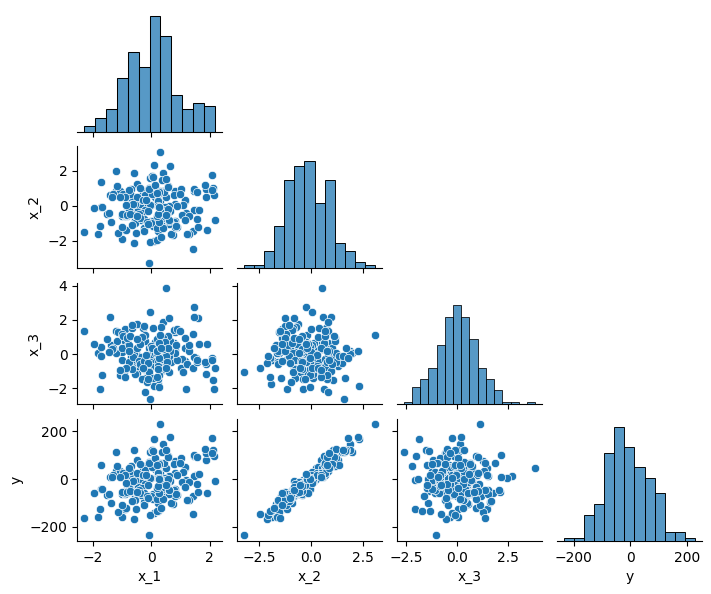

In [1]:
from sklearn.datasets import make_regression
import seaborn as sns
import numpy as np
import pandas as pd


X, y = make_regression(200, n_features=3, n_informative=2, noise = 0.5, random_state=42)
data = np.concatenate((X, y.reshape(-1, 1)), axis = 1)
df = pd.DataFrame(data, columns = ["x_1", "x_2", "x_3", "y"])
sns.pairplot(df, corner = True, height = 1.5, aspect=1.2)

The cell below shows regression results for all combinations which can be chosen for the predictor variables $x_1, x_2, x_3$. From the table, we can identify that $x_1$ alone explains most of the variation of $y$. Furthermore, including $x_2$ increases the level of variation which can be explained. Adding $x_3$ is not improving the explanatory power. By the signs of the predicted beta-coefficients we further would identify a positive relationship between $x_1, x_2$ and the target variable.

In [ ]:
import pyfixest as pf
from itertools import combinations

predictors = ["x_1", "x_2", "x_3"]
predictor_combinations = []
for k in range(1,4,1):
    for subset in combinations(predictors, k):
        predictor_combinations.append(list(subset))

regressions = {}
for nbr, predictor_combination in enumerate(predictor_combinations):
    model_string = f"y ~ {' + '.join(predictor_combination)}"
    regressions[f"model_{nbr+1}"] = pf.feols(
        model_string,
        data = df
    )

pf.etable(list(regressions.values()))

GT(_tbl_data=  level_0        level_1                       0                       1  \
0    coef            x_1  25.789*** <br> (5.762)                           
1    coef            x_2                          72.930*** <br> (1.450)   
2    coef            x_3                                                   
3    coef      Intercept   -10.783* <br> (5.148)      1.542 <br> (1.468)   
4   stats   Observations                     200                     200   
5   stats      S.E. type                     iid                     iid   
6   stats  R<sup>2</sup>                   0.092                   0.927   

                     2                       3                       4  \
0                       22.935*** <br> (0.041)  25.474*** <br> (5.773)   
1                       72.212*** <br> (0.036)                           
2  -6.161 <br> (5.351)                             -4.859 <br> (5.126)   
3  -8.901 <br> (5.376)      0.003 <br> (0.037)   -10.550* <br> (5.155)   
4                  200                     200                     200   
5                  iid                     iid                     iid   
6                0.007                   1.000                   0.096   

                        5                       6  
0                          22.933*** <br> (0.041)  
1  72.850*** <br> (1.455)  72.210*** <br> (0.036)  
2     -1.168 <br> (1.451)     -0.040 <br> (0.036)  
3      1.581 <br> (1.470)      0.005 <br> (0.037)  
4                     200                     200  
5                     iid                     iid  
6                   0.928                   1.000  , _body=<great_tables._gt_data.Body object at 0x36af356d0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None), ColInfo(var='4', type=<ColInfoTypeEnum.default: 1>, column_label='(5)', column_align='center', column_width=None), ColInfo(var='5', type=<ColInfoTypeEnum.default: 1>, column_label='(6)', column_align='center', column_width=None), ColInfo(var='6', type=<ColInfoTypeEnum.default: 1>, column_label='(7)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x36aee3e50>, _spanners=Spanners([SpannerInfo(spanner_id='y', spanner_level=1, spanner_label='y', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3', '4', '5', '6'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x36af91450>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, categor

How do we use this for the analysis of financial stock market reactions towards firm disclosure in textual form? If we only would include the prediction of the stock market reaction we can estimate a regression model of the form:

$$
cr_{it, w} = \beta_0 + \beta_1 + \hat{cr}_{it, w} + \epsilon_{it}
$$

where the index $i$ represents companies and $t$ is the time step of event which occurs at $t$ for company $i$. This means we use the prediction as a explanatory variable. A large value of $R^2$ would indicate predictions being close to realizations, thus, explaining a large amount of the variation of stock market reactions. However, if further feature variables exist which also are able to explain the variation of $cr_{t, w}$, not including them can cause a bias for the estimator of $\beta_1$, thus, false quantification of its impact. This is why we should further add other feature variables to the regression which may be related to $cr_{t, w}$. From the literature, it is known that, e.g., the size of a company or its book-to-market value are related to the returns of a company. This is why they also might be related to cumulative excess or abnormal returns. Thus, the regression usually also includes further variable which are called control variables $C$:

$$
cr_{it, w} = \beta_0 + \beta_1 \hat{cr}_{it, w} + \mathbf{\gamma} C_{it} + \epsilon_{it}
$$

Without going to much into the details, for econometric reasons we further often include a constant parameter which is different for every company and a specific time period $t'$, e.g., a quarter or year. The regression becomes:

$$
cr_{it, w} = \beta_i + \beta_{t'} + \beta_1 \hat{cr}_{it, w} + \mathbf{\gamma}^T C_{it} + \epsilon_{it}
$$

Even though it looks more complicated, the interpretation in terms of adjusted $R^2$ and $\beta$ coefficients remain as before. 

## Examples from the literature

Let us take a look from a popular research paper by [Loughran and McDonald (2011)](https://www.uts.edu.au/sites/default/files/ADG_Cons2015_Loughran%20McDonald%20JE%202011.pdf). They do not create predictions for financial sentiment, however, as described in the former chapters, they define a finance specific dictionary and count the frequency of negative tone in form 10-K annual filings of stock market listed companies. This variable is called Fin-Neg in the table of their paper below. The ability of this variable to explain the variation the cumulative excess return over the annual report's disclosure is compared to the negative tone measured by words from a more common dictionary that is not finance specific (H4N-Inf). 

If you take a look in the table below, you also see further variables which are included as control variables. Furthermore the Average $R^2$ is the average of $R^2$ values over multiple regression from different quarters. Also the displayed coefficients are averages of estimated coefficients over all quarters. Values in curly brackets are t-statistics which can be used for statistical inference. Under normality of the t-value, absolute values exceeding $1.645$ are the ones which would reject the null hypothesis of no impact under common significance levels. Proportional Weights are the frequencies of negative words in annual reports, the two columns to the right exhibit results when negative terms are weighted by their inverse document frequencies before aggregation. 

If we take a look at the two columns referring to the proportional weights, we observe a negative impact of negative tone on stock market reactions. The interesting take away is that the impact of the variable using the finance specific dictionary is statistically different from zero, while the one using the common dictionary is not. At the same time, variables of both dictionaries exhibit a negative impact on stock market reactions that is statistically different from zero. Thus, investors seem to react towards textual information of annual reports. Nevertheless, this result should not be overstated as the average value of $R^2$ scores is relatively small. This indicates that only little of the actual variation of stock market reactions can be explained by the control and text variables. This is rather common in the financial domain which is largely exposed to randomness and lacks of strong deterministic relationships between firm variables and stock market developments. 

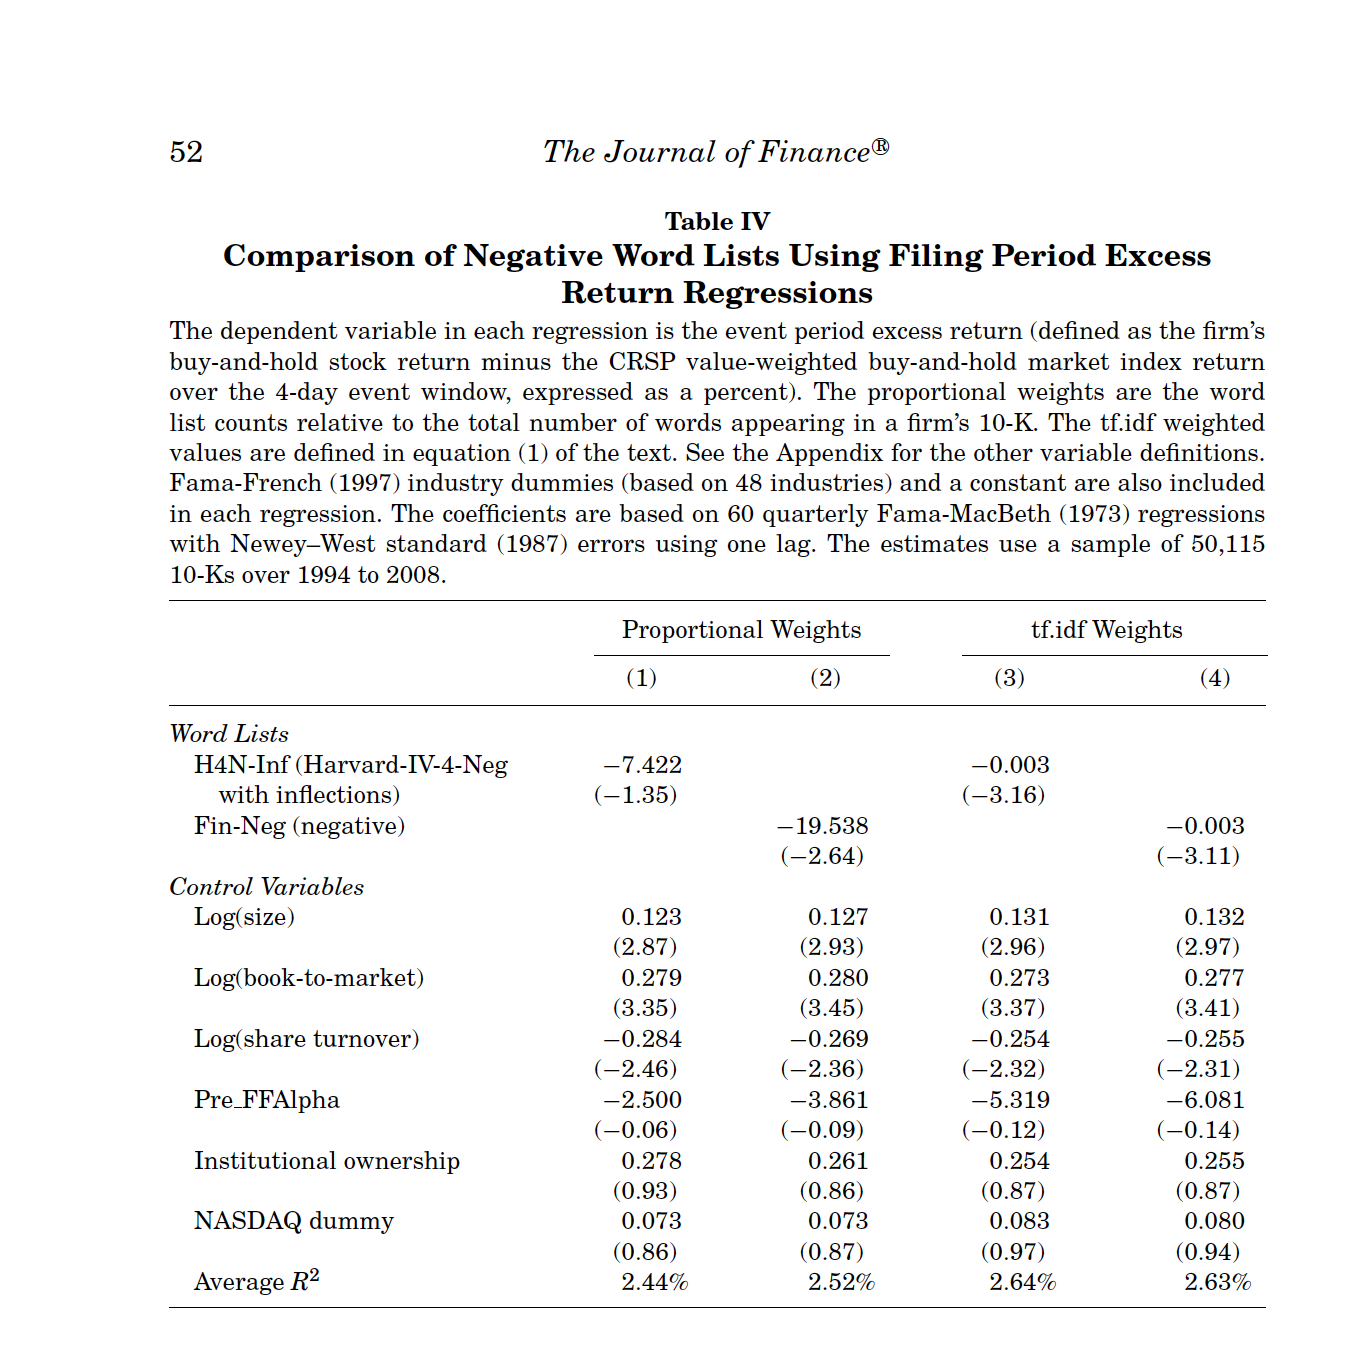

In [7]:
from IPython.display import Image
Image(filename='lmcd_results_table.png', width = 700) 

The study from above is repeated by [Frankel et. al (2022)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3845780) using data up to more recent time periods. They find that the impact of negative tone measured by the dictionary of Loughran and MacDonald seems to vanish. Three variables are examined:

* Tone: number of positive words minus negative words divided by the number of positive and negative words
* Pos Tone: frequency of positive words
* Neg Tone: frequency of negative words

Each of them do not exhibit a considerable impact from a statistical impact for the larger time period between 1996 and 2019. However, the authors show two more things in their paper:

1. Machine learning based sentiment predictions as described in this chapter exhibit a significant impact to explain the variation of stock market reactions.
2. By far more variation can be explained for cumulative abnormal returns surrounding earning conference calls in comparison to annual reports.

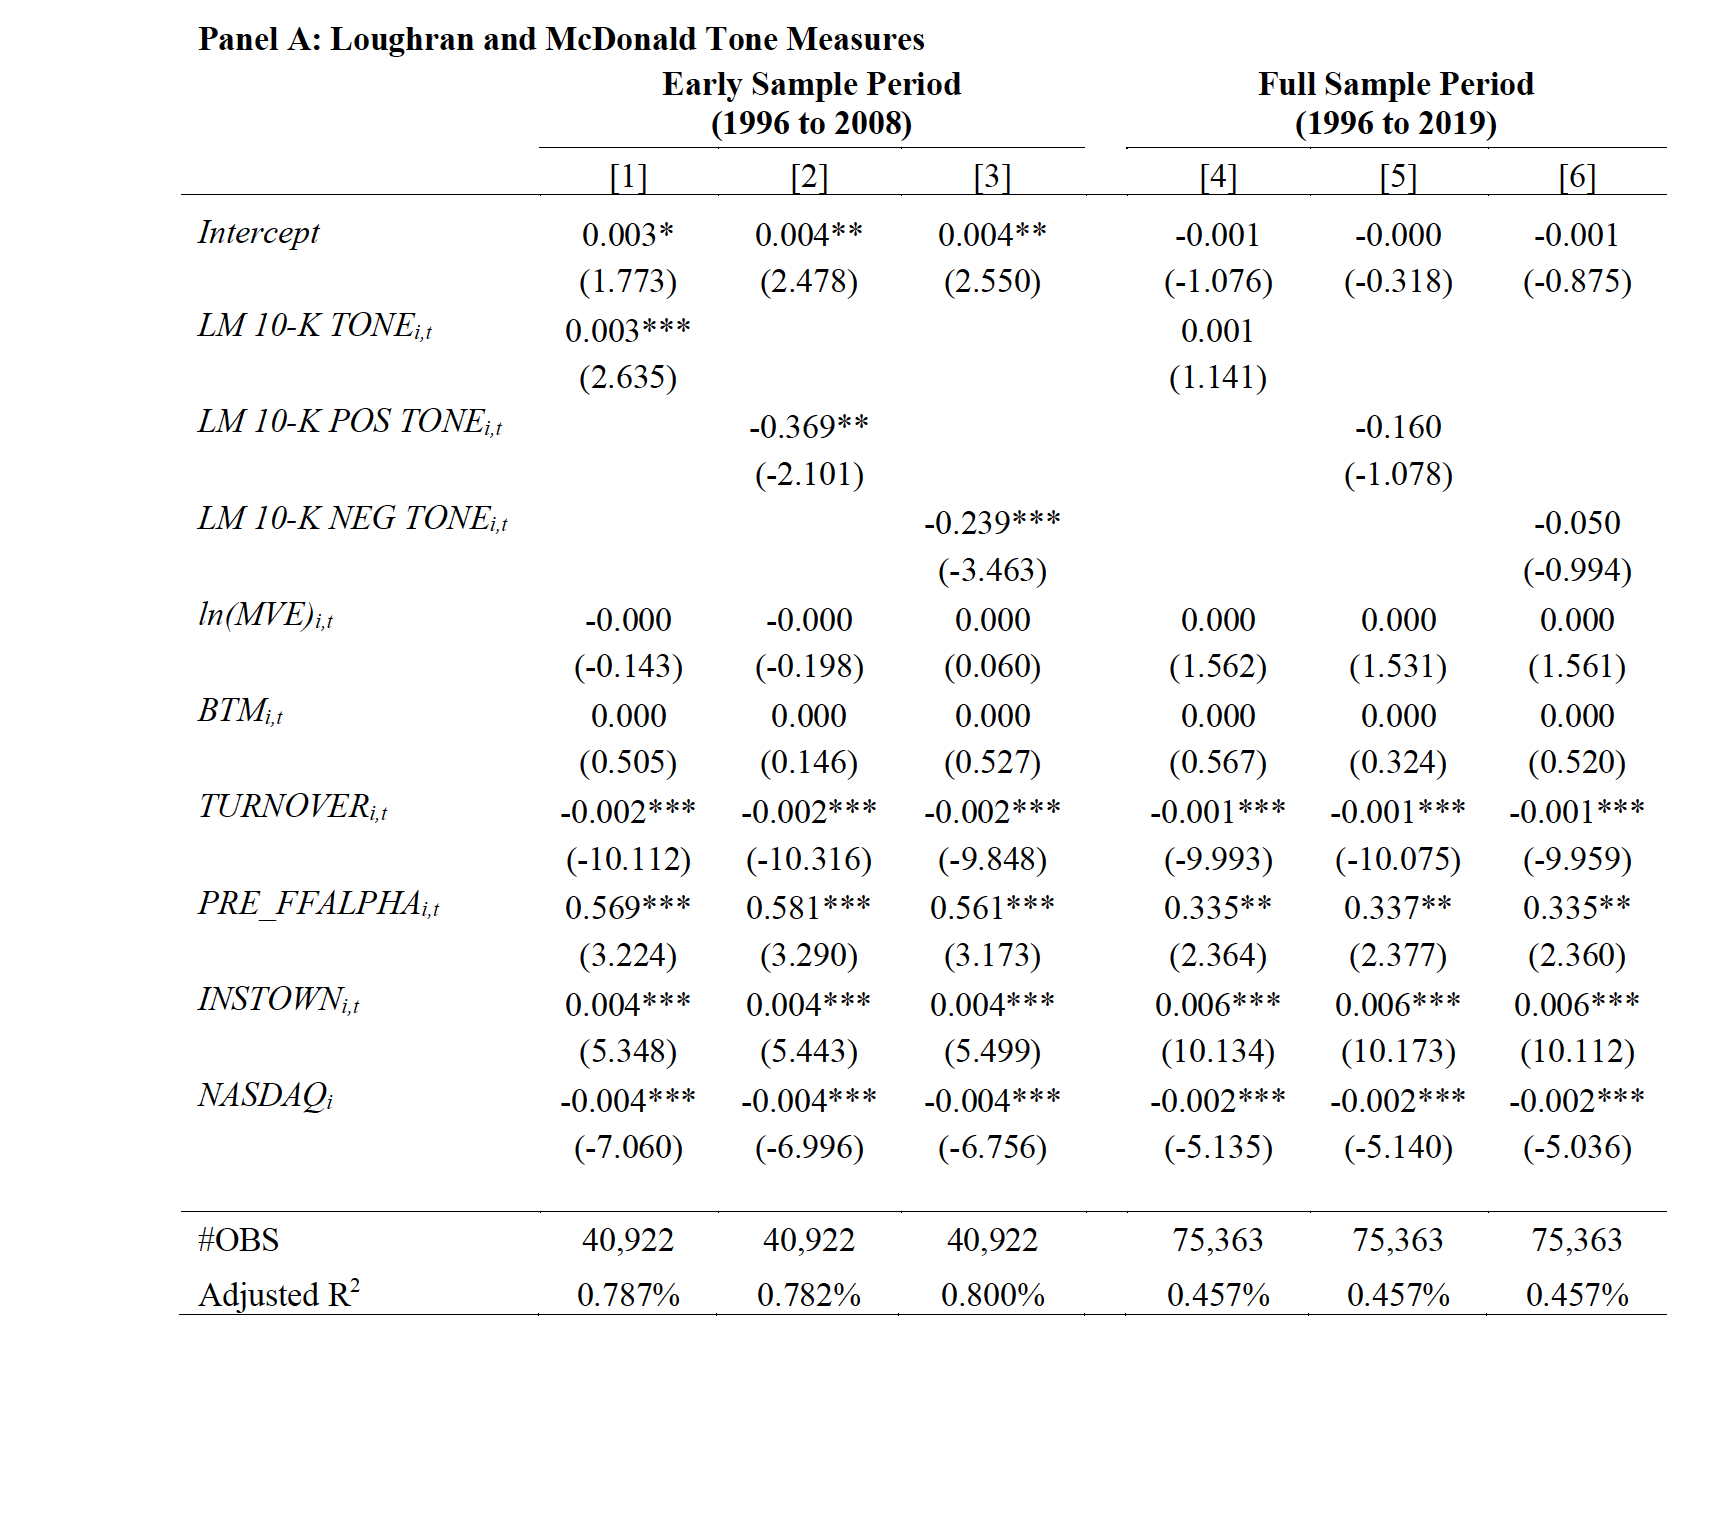

In [8]:
from IPython.display import Image
Image(filename='frankel_1.png', width = 700) 

In their paper, they compare different machine learning models, but random forests which are trained on uni- and bigram counts of documents exhibit the best prediction performance. The table below contrasts the impact of random forest sentiment prediction (RF) to the Loughran and MacDonald tone (LM) and the one derived by the common Harvard dictionary (HARV). Each of the variables has a positive impact on the stock market reaction around a earning call, however as can be seen by the adjusted $R^2$, the random forest sentiment variable is at least twice as high as for the other variables. This indicates that the random forest prediction is capturing the financial sentiment in a more precise manner.

 Comparing the $R^2$ levels of the table above (10-K) and the one below (earning calls), demonstrates that much more of the stock market reaction to earning calls is explainable by control variables and the text variable. A reason for this may lie in the nature of both events. Earning calls are usually before annual or quarter reports are released. Furthermore, they are less prepared and may allow analysts and investors to elicit more relevant information from firm representatives. Thus, information released in 10-K reports are known before and included in asset prices before the event occurs.

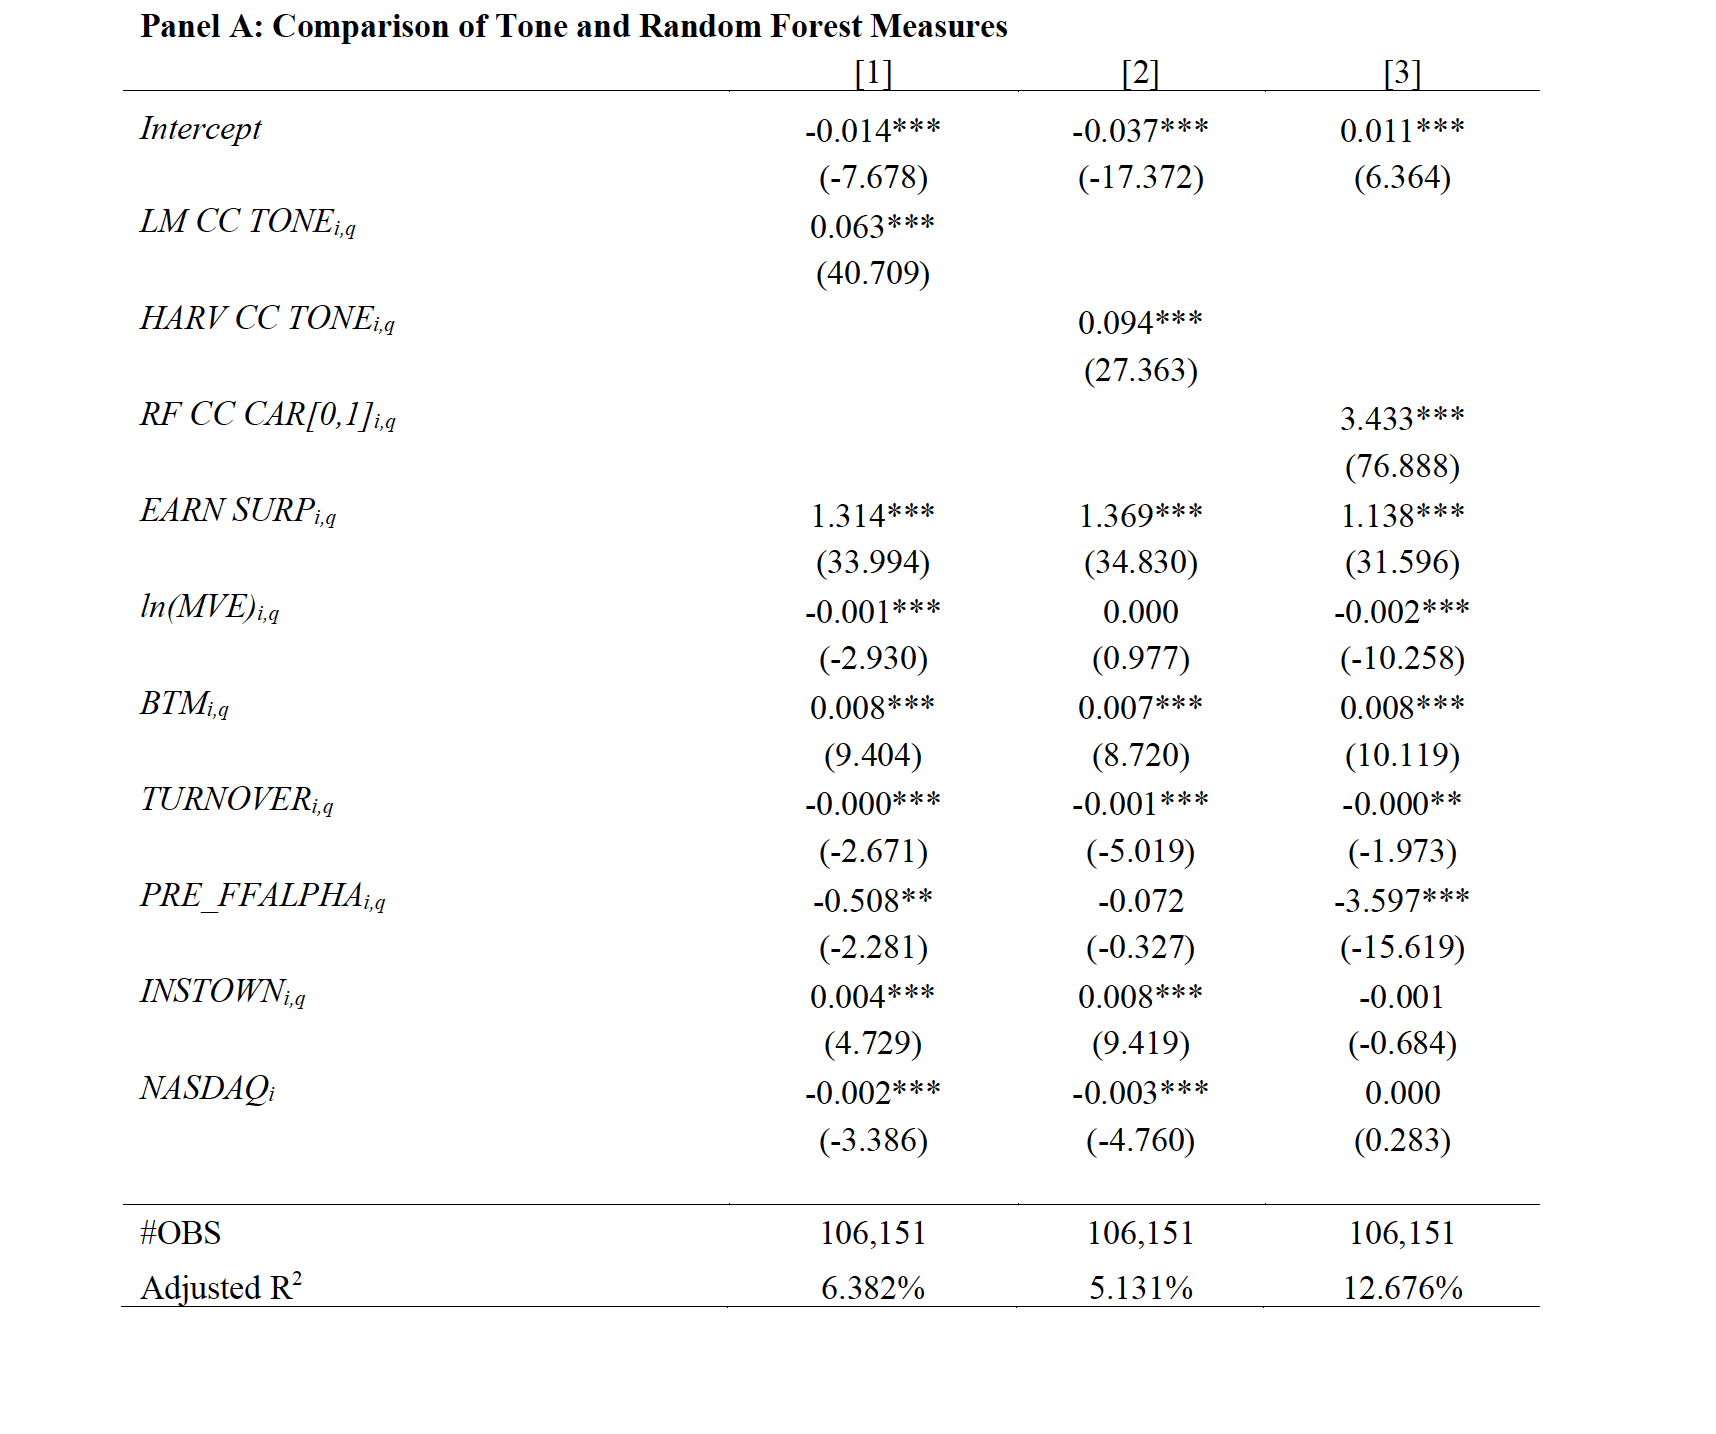

In [9]:
from IPython.display import Image
Image(filename='frankel_2.png', width = 700) 

##